
# A nearest neighbor learning algorithm example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [10]:
import numpy as np
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## check the data

(5000, 784)
(5000, 10)
(28, 28)
2
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


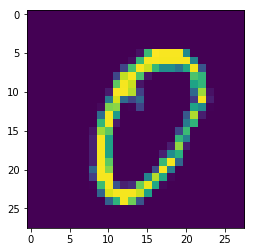

(28, 28)
2
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


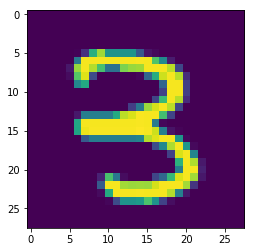

(28, 28)
2
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


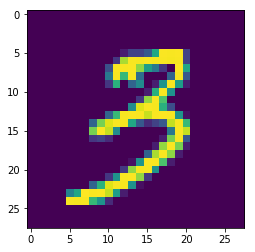

In [56]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing
print(Xtr.shape)
print(Ytr.shape)
import matplotlib.pyplot as plt
import numpy as np
for i in range(0,3):
    first_array = Xtr[i,...]
    first_image = np.reshape(first_array,(28,28))
    print(first_image.shape)
    print(np.asarray(first_image).ndim )
    print(Ytr[i,...])
    plt.imshow(first_image)
    plt.show()

In [59]:

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])
# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)

# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)
accuracy = 0.

# Initializing the variables
init = tf.global_variables_initializer()

In [5]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print ("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print ("Done!")
    print ("Accuracy:", accuracy)

Test 0 Prediction: 0 True Class: 0
Test 1 Prediction: 5 True Class: 5
Test 2 Prediction: 9 True Class: 9
Test 3 Prediction: 7 True Class: 7
Test 4 Prediction: 0 True Class: 0
Test 5 Prediction: 2 True Class: 2
Test 6 Prediction: 9 True Class: 9
Test 7 Prediction: 8 True Class: 8
Test 8 Prediction: 1 True Class: 1
Test 9 Prediction: 8 True Class: 8
Test 10 Prediction: 3 True Class: 8
Test 11 Prediction: 7 True Class: 8
Test 12 Prediction: 9 True Class: 9
Test 13 Prediction: 5 True Class: 5
Test 14 Prediction: 4 True Class: 4
Test 15 Prediction: 4 True Class: 4
Test 16 Prediction: 0 True Class: 0
Test 17 Prediction: 2 True Class: 2
Test 18 Prediction: 1 True Class: 1
Test 19 Prediction: 4 True Class: 4
Test 20 Prediction: 0 True Class: 0
Test 21 Prediction: 0 True Class: 0
Test 22 Prediction: 9 True Class: 9
Test 23 Prediction: 7 True Class: 7
Test 24 Prediction: 9 True Class: 9
Test 25 Prediction: 6 True Class: 6
Test 26 Prediction: 1 True Class: 2
Test 27 Prediction: 9 True Class: 9
Te